In [87]:
import os
from PIL import Image
import tensorflow as tf

In [88]:
img = Image.open('demo.tif')

In [106]:
img.size

(640, 480)

In [107]:
img.mode

'P'

In [108]:
img.format

'TIFF'

In [109]:
img.info

{'compression': 'tiff_lzw', 'dpi': (80.0, 80.0)}

In [110]:
img.getpixel((0,0))

13

In [111]:
demo = img.convert('RGB')

In [112]:
demo.getpixel((300,300))

(255, 204, 170)

In [113]:
demo.mode

'RGB'

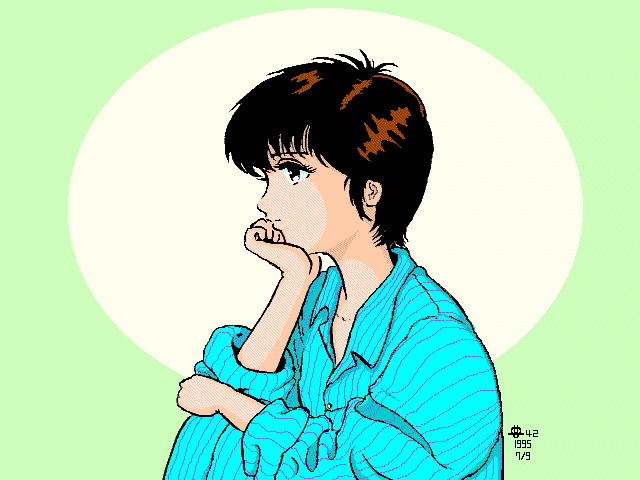

In [114]:
demo.convert('P')

In [121]:
demo = img.resize([1920,1080])
a = [[]]

In [122]:
a = demo.size
a

(1920, 1080)

In [117]:
import glob
glob.glob("*.py")

['tiff.py']

In [118]:
class preparation_tensorflow:
    """essential library list
        os, PIL, tensorflow, glob"""
    def __init__(self):
        self.img = ""
        self.SIZE = ()
        self.MODE = ""
        self.preX = []
        self.x = [[]]
        self.file_list = []
        
    def get_init(self,tif_path):
        self.img = Image.open(tif_path)
        self.size = self.img.size
        self.mode = self.img.mode
        for i in range(self.size[0]):
            for j in range(self.size[1]):
                self.preX.append(self.img.getpixel((i,j)))
                
    def get_in_dir(self.dir_path):
        self.file_size = glob.glob(dir_path)
        if len(self.x) == 0:
            get_init(dir_path[0])
            self.x.append(self.preX)
            self.preX = []
            del dir_path[0]
        for f in dir_path:
            

In [119]:
tf.Variable(112.5)

<tf.Variable 'Variable_13:0' shape=() dtype=float32_ref>

In [120]:
demo = preparation_tensorflow()
demo.get_init("demo.tif")
len(demo.x)

307201